In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
data = pd.read_csv("happiness_score.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Statistical Summary

In [3]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
data.shape

(158, 12)

From the above we can see that there are total 158 rows and 12 columns with no null values.

In [6]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

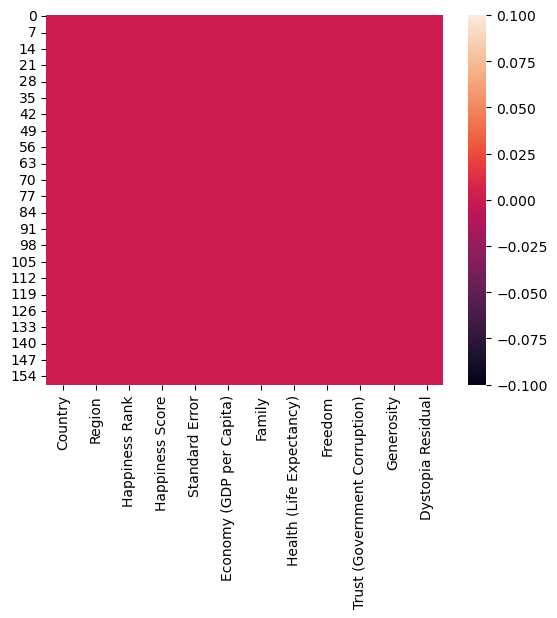

In [7]:
# null values by visuals
sns.heatmap(data.isnull())

In [8]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Here we can see the Country, Region and the happiness rank columns are not much useful to predict the score, so we are going to drop that.

In [9]:
# making the new dataframe
data1 = data[data.columns[3:]]
data1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [10]:
data1.shape

(158, 9)

In [11]:
x = data1.iloc[:,1:]
print(x.shape)
x.head()

(158, 8)


,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [12]:
y = data1.iloc[:,0]
print(y.shape)
y.head()

(158,)


0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

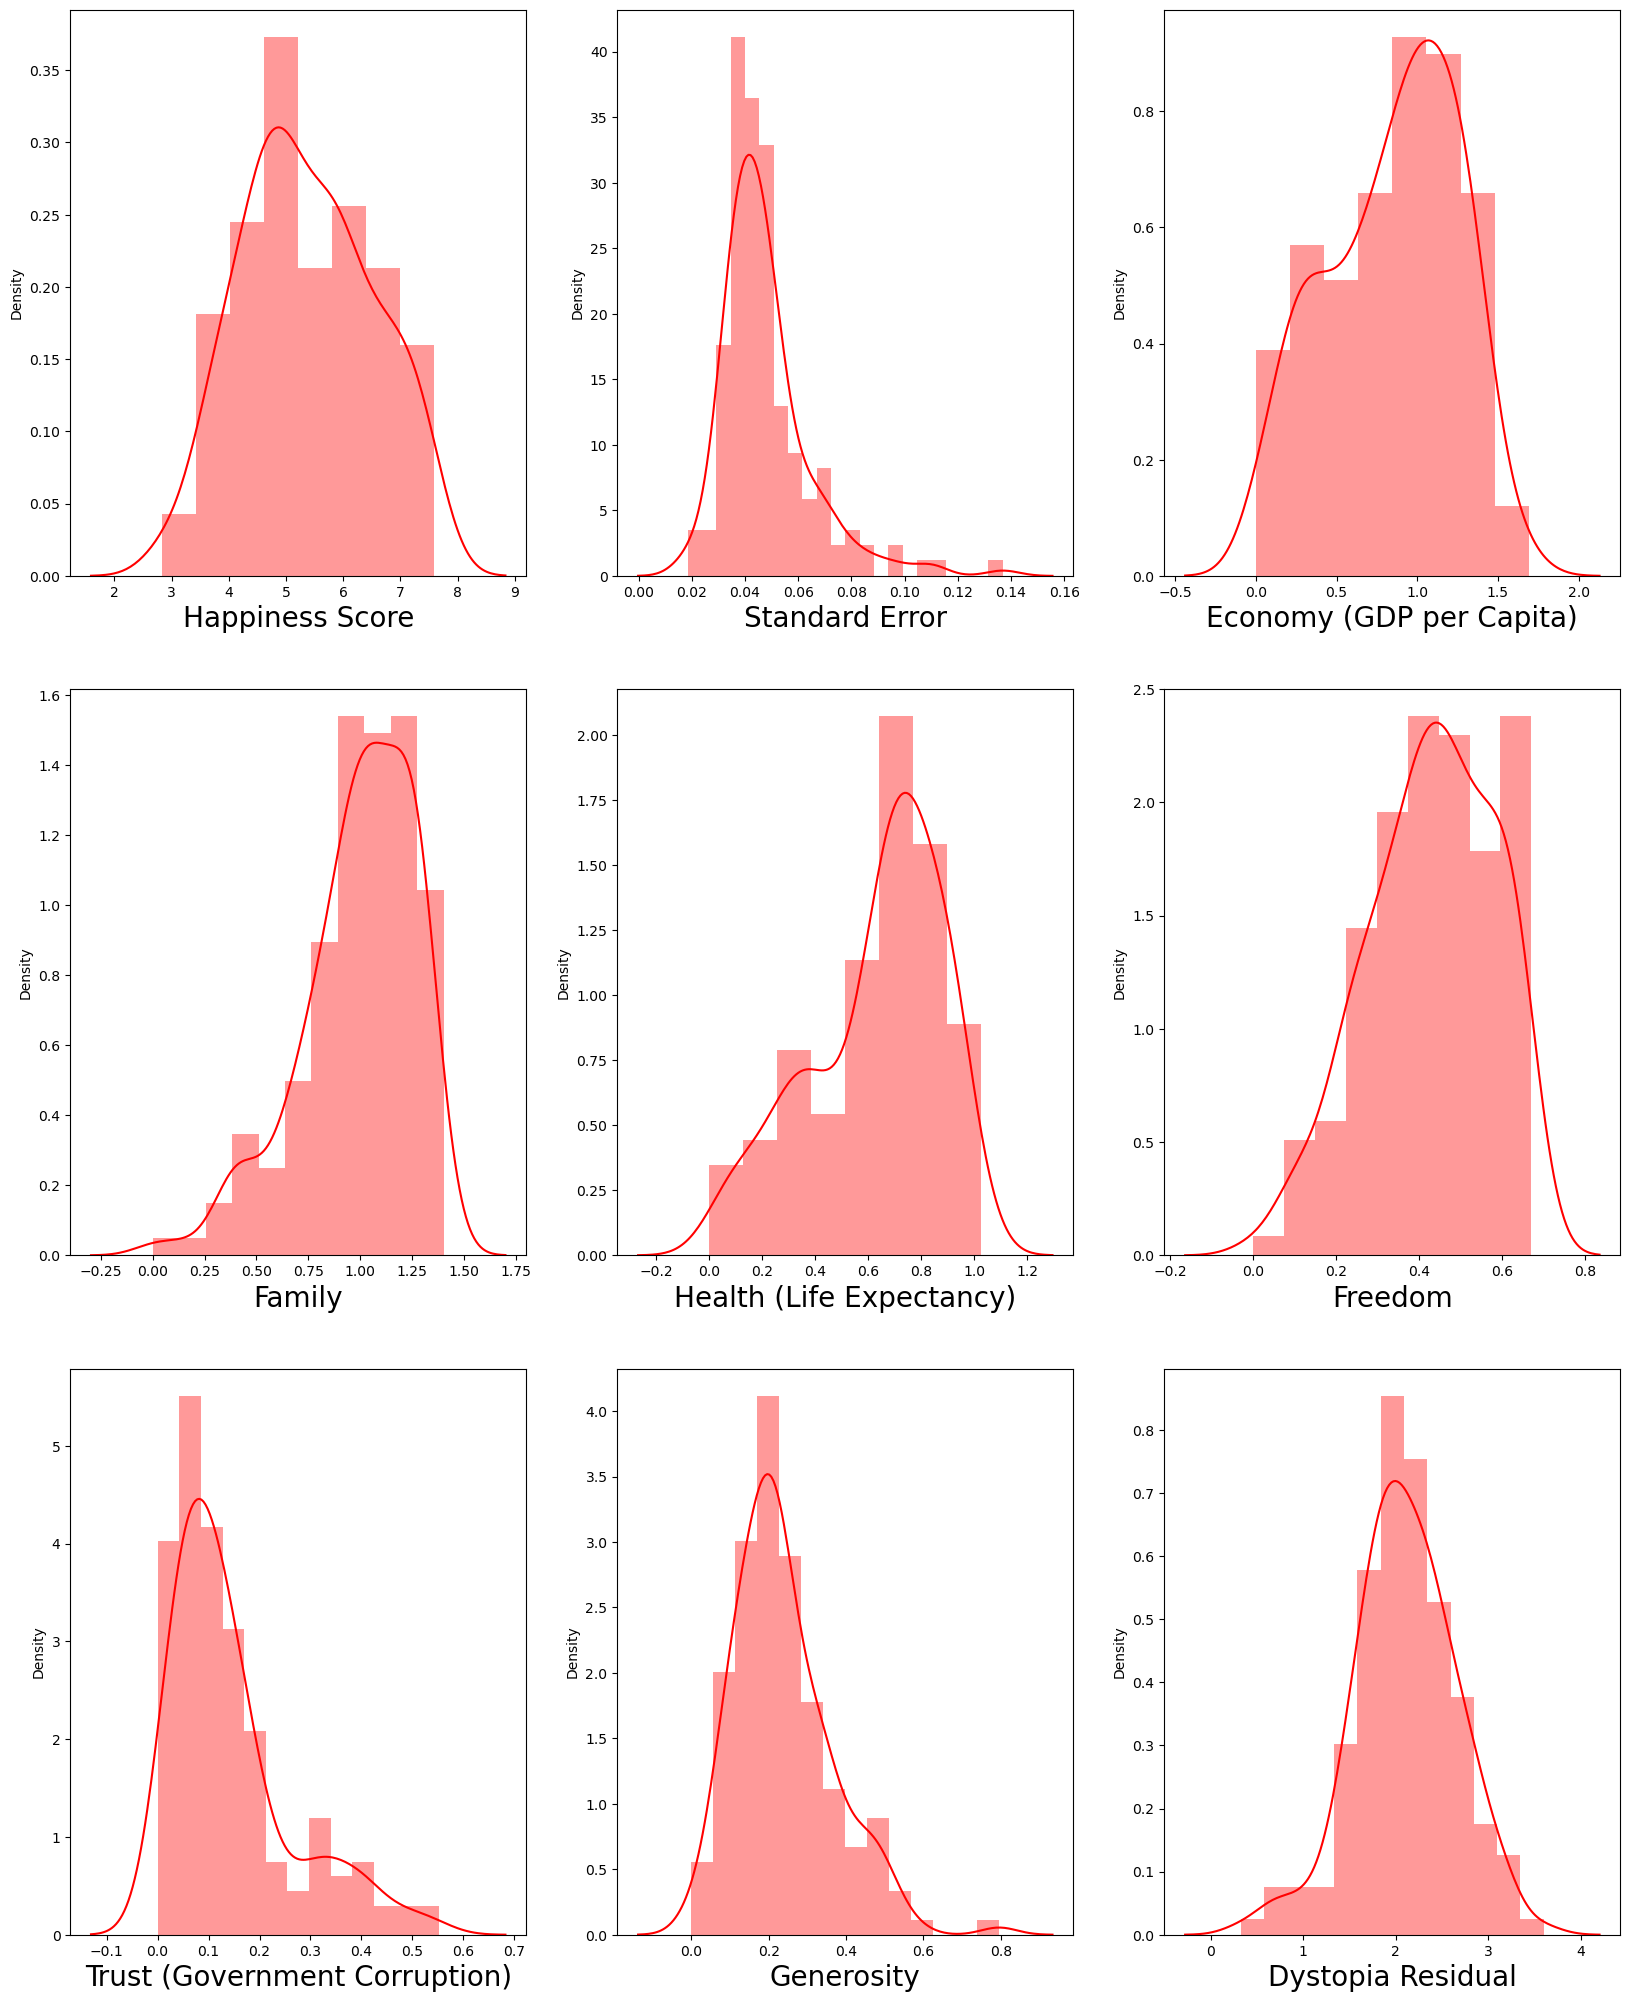

In [13]:
#EDA
#checking the skewness
plt.figure(figsize=(20,25))
plotnumber =1
for col in data1:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data1[col], color='r')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()


In [14]:
data1.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Here we can see the Standard Error ,Generosity and trust are right skewed.

In [15]:
#Removing the skewness
from scipy.stats import boxcox
data['Standard Error'] = boxcox(data['Standard Error'],0)  # --> 0 is for log transformation

In [16]:
data.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [17]:
#multicollinearity using the Varience_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
vif =pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features'] = x.columns

In [19]:
vif

,vif,Features
0,7.166167,Standard Error
1,21.759914,Economy (GDP per Capita)
2,25.636995,Family
3,23.090959,Health (Life Expectancy)
4,15.880880,Freedom
5,3.497600,Trust (Government Corruption)
6,5.600094,Generosity
7,12.574726,Dystopia Residual


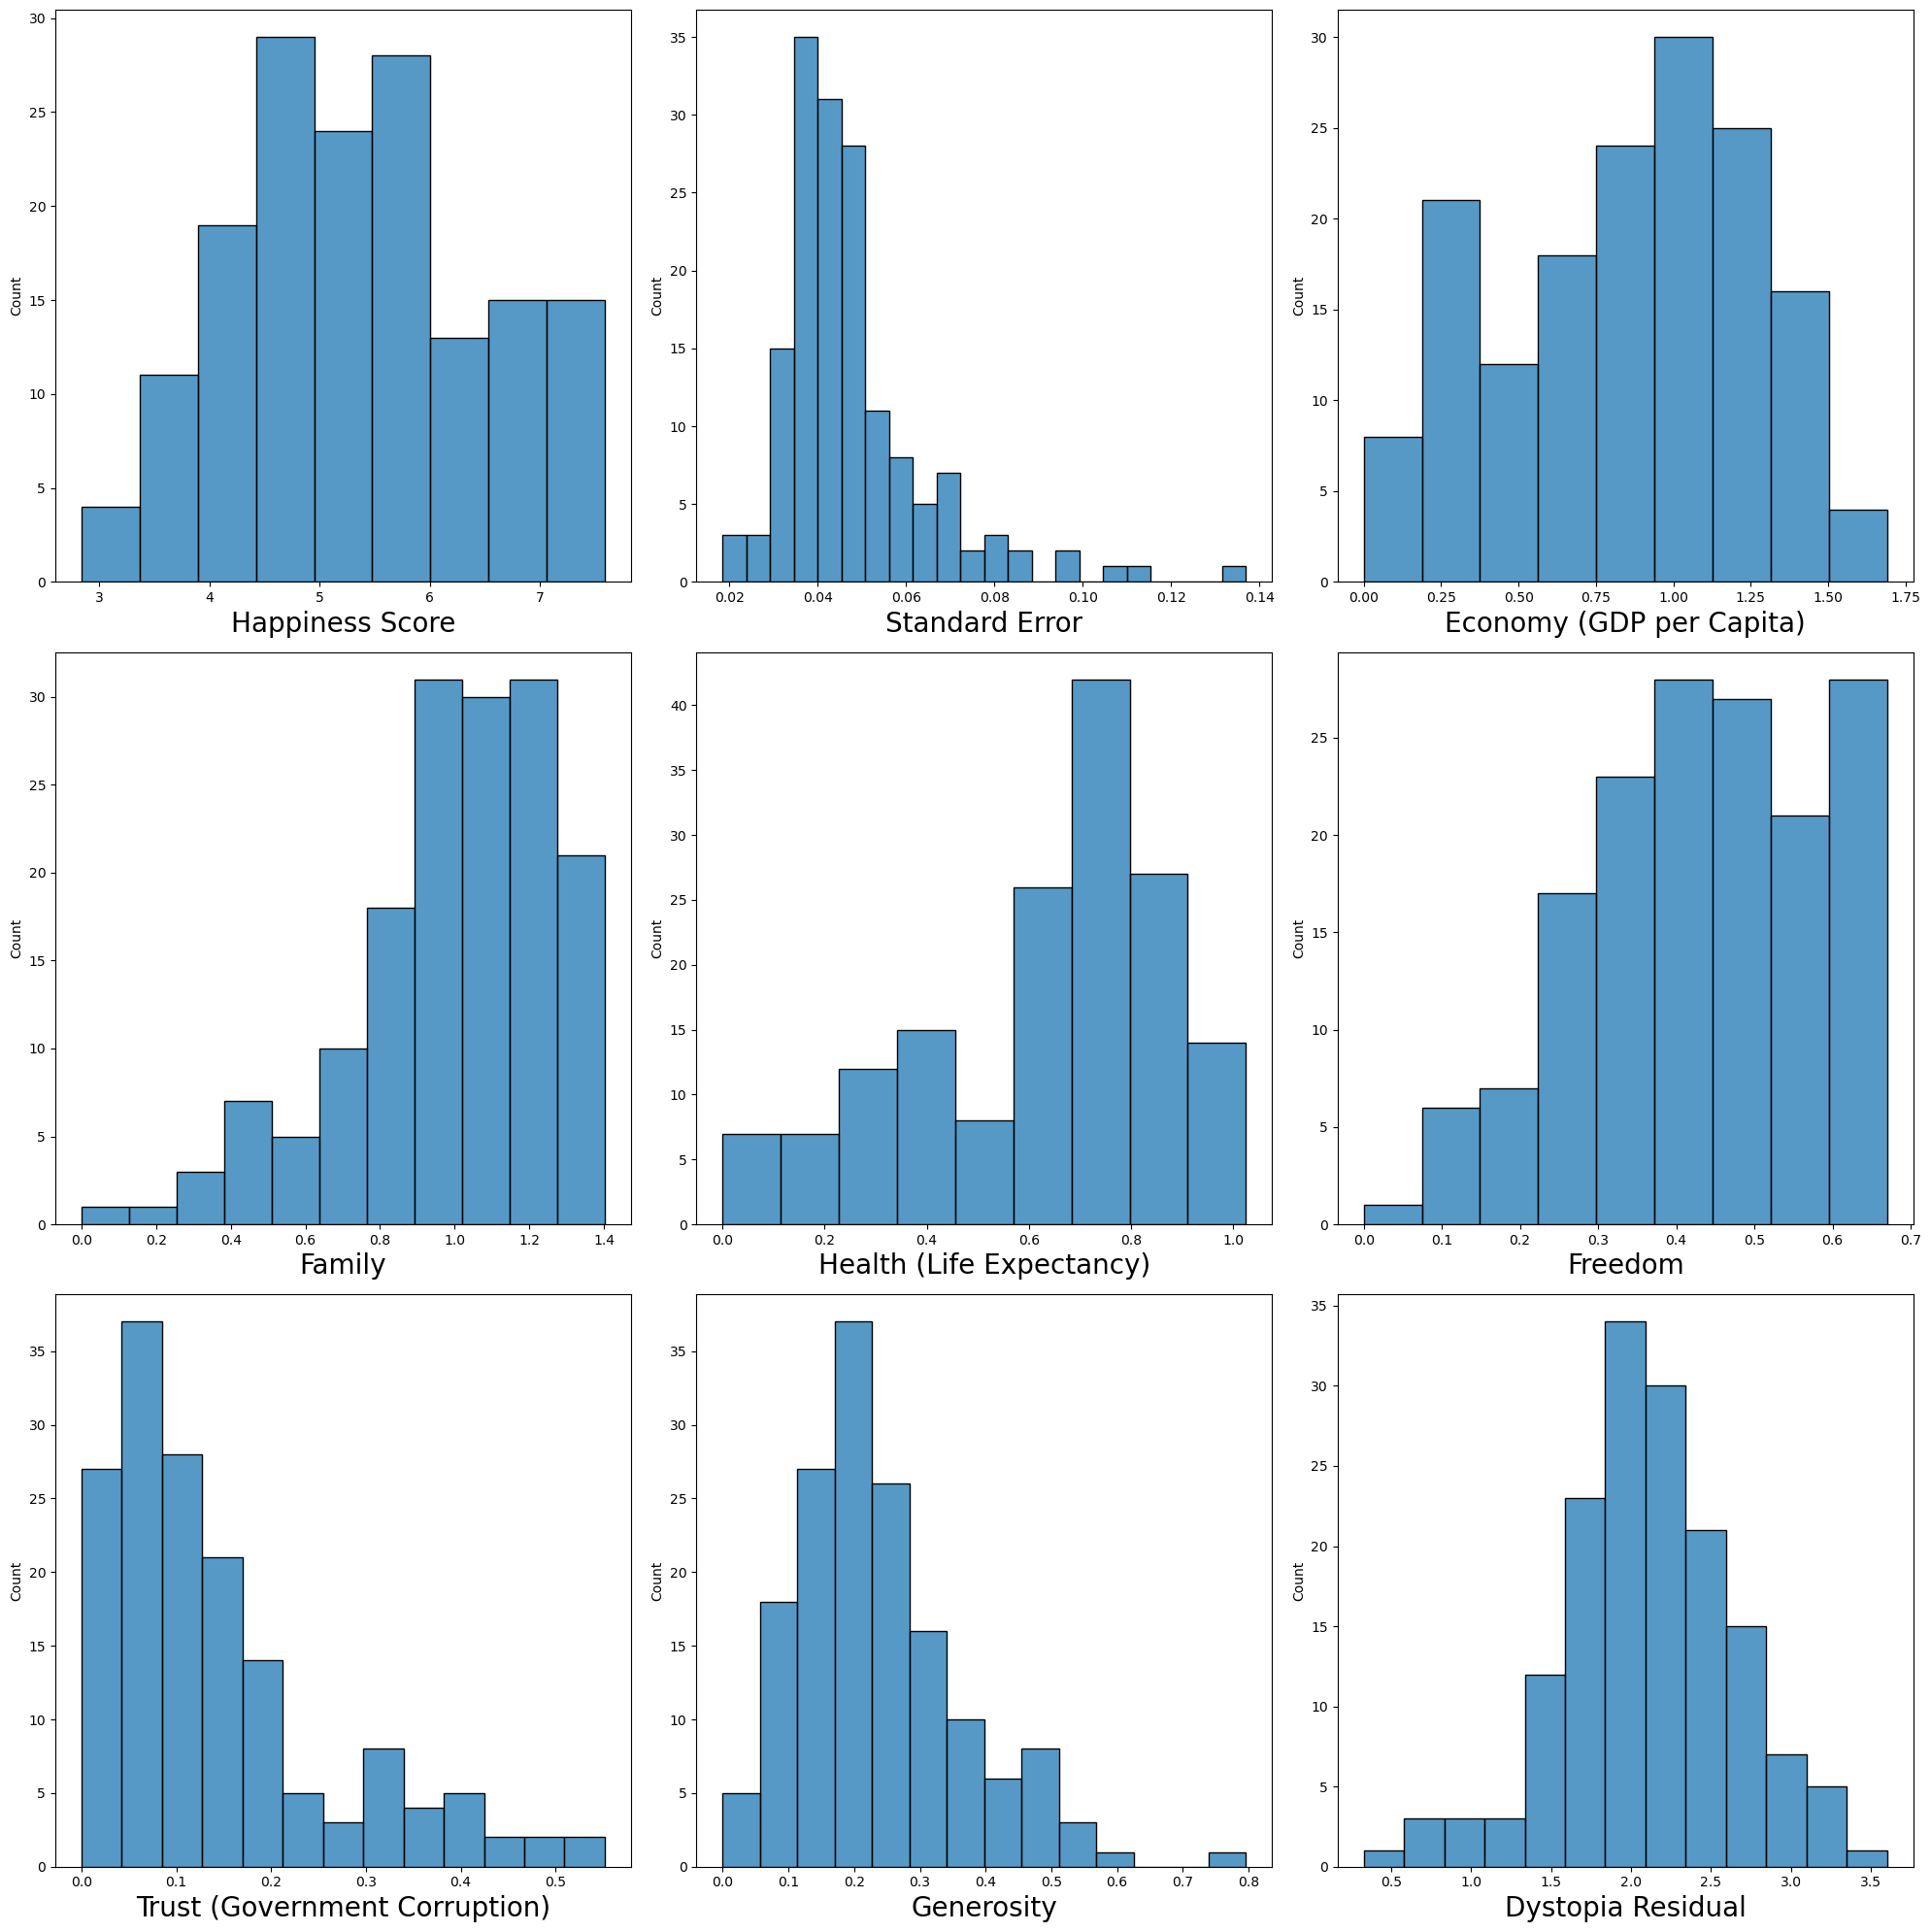

In [20]:
plt.figure(figsize=(20,20))
plotnumber =1
for col in data1:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data1[col], palette='Rainbow' )
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

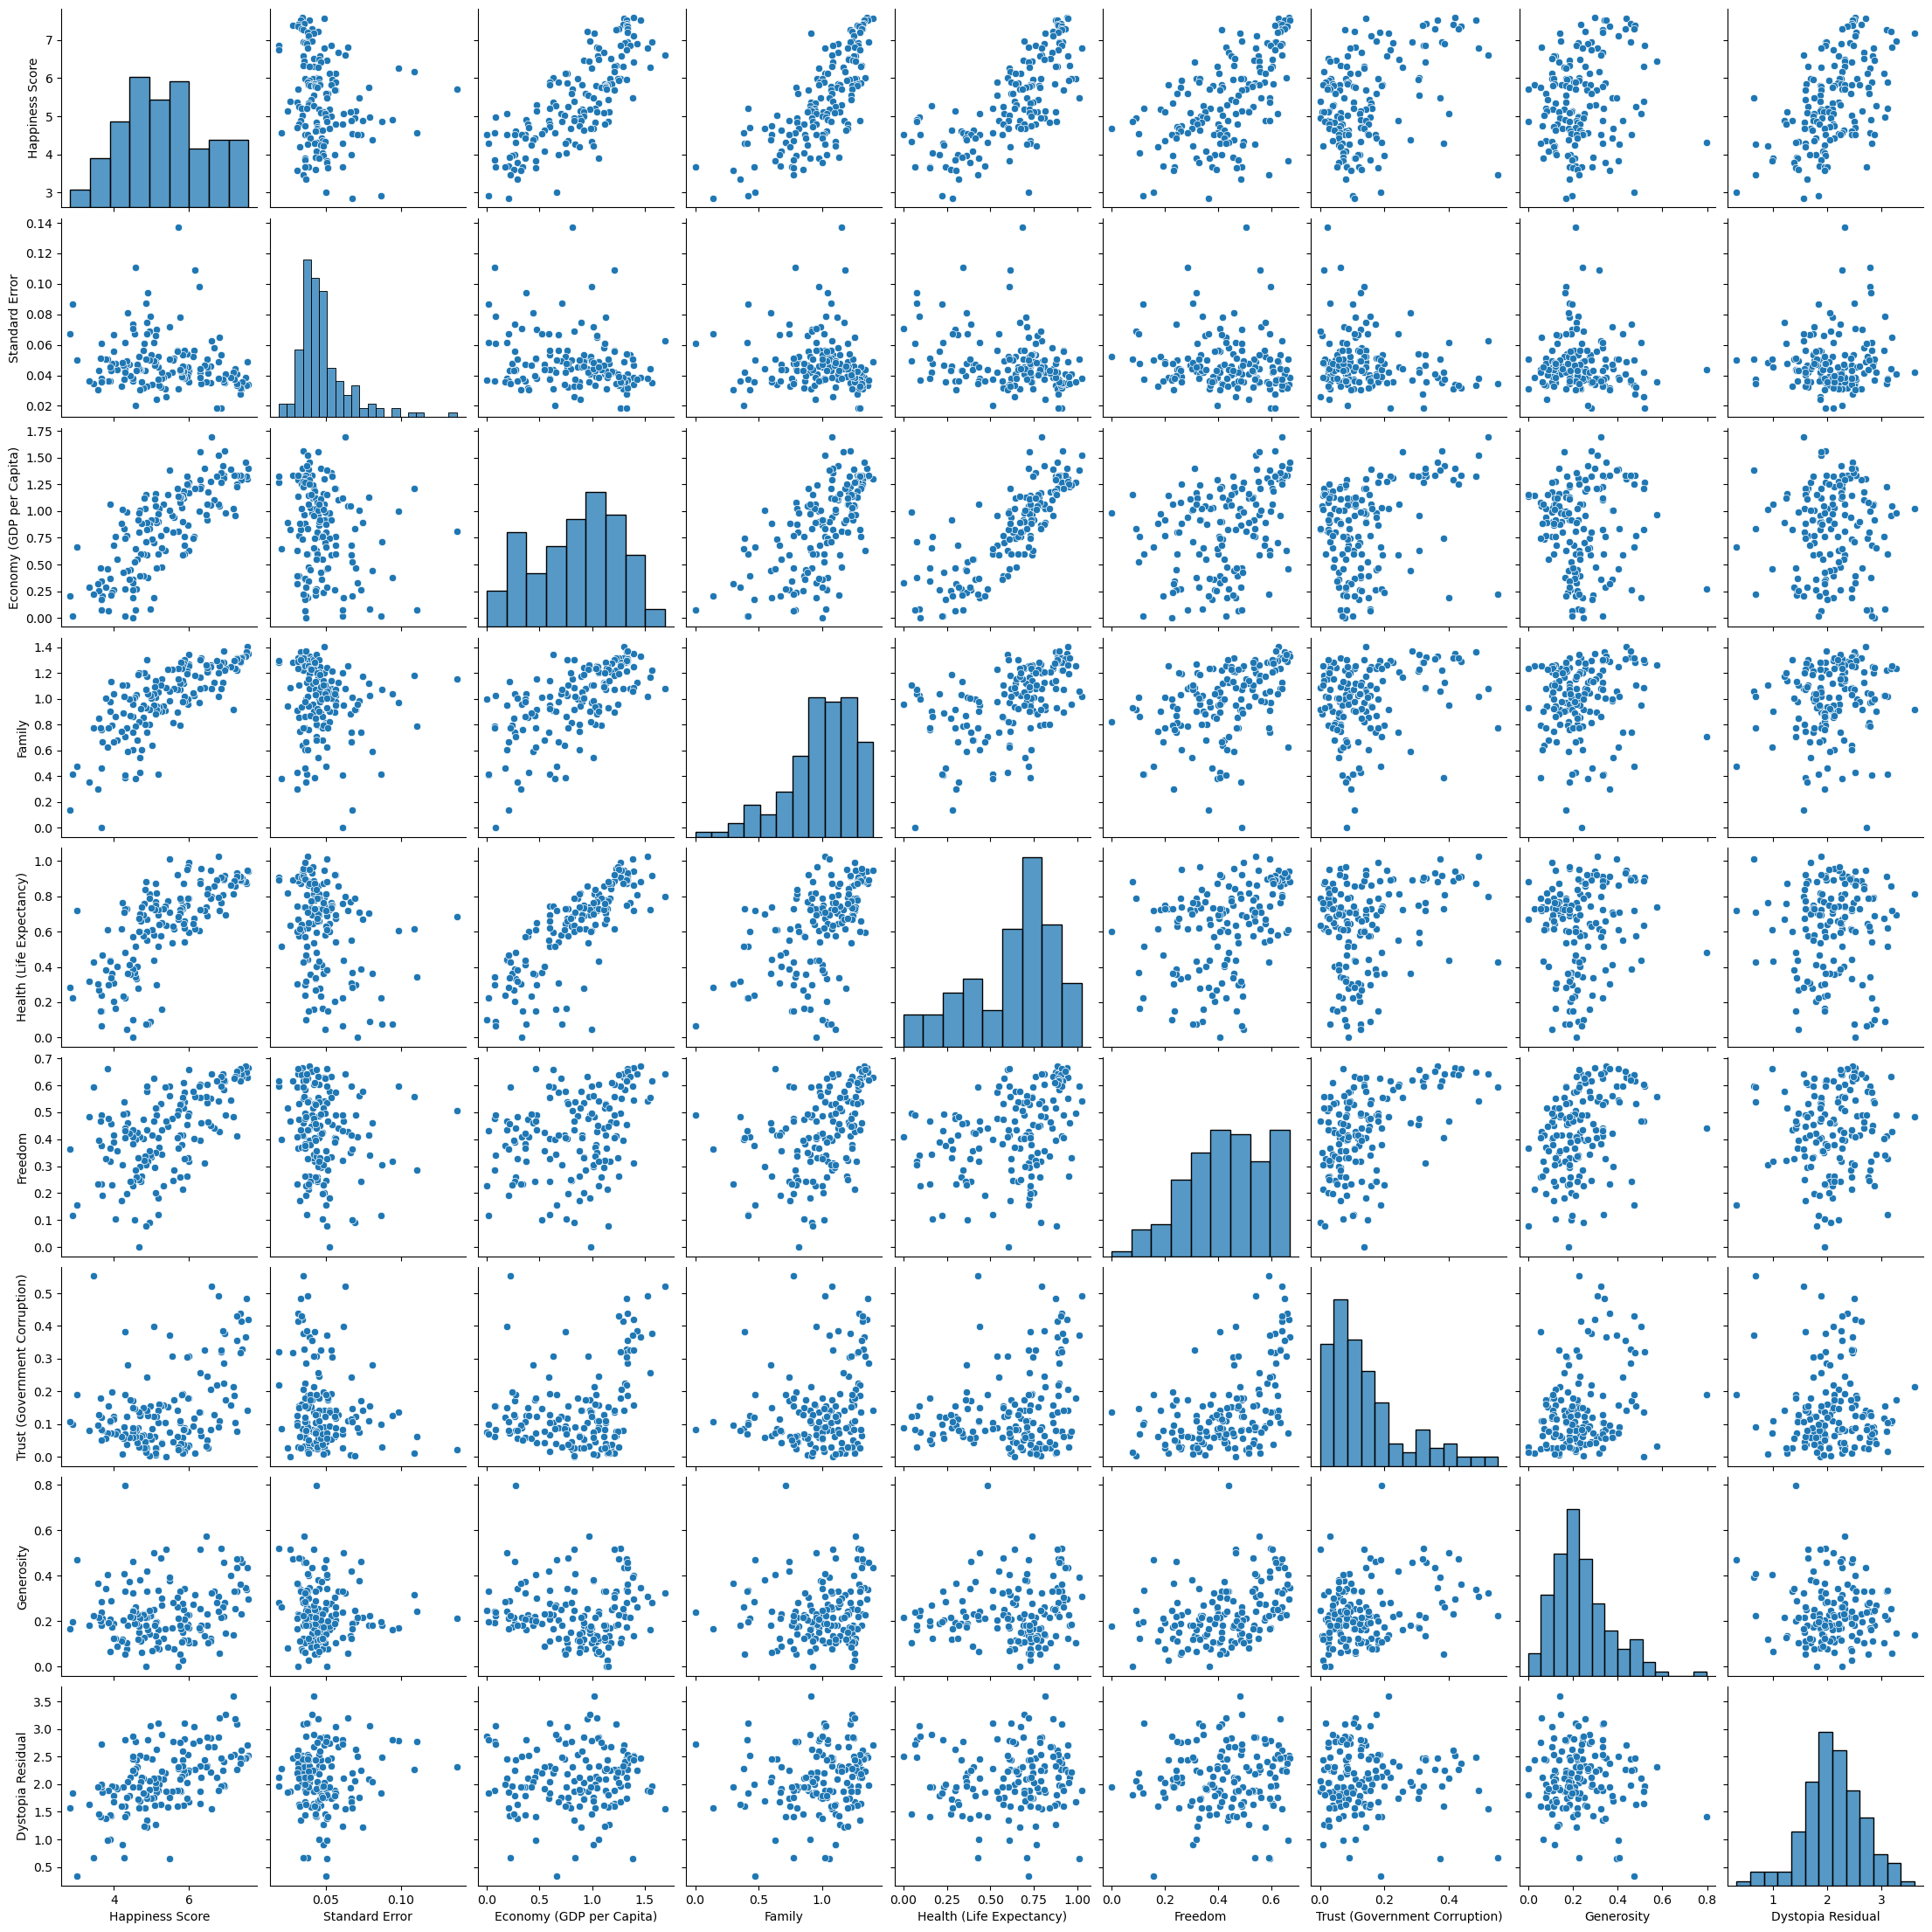

In [21]:
#using pairplot
sns.pairplot(data1)

In [22]:
#correlation
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.190675,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.210296,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.190675,-0.210296,1.000000,-0.223477,-0.133812,-0.320471,-0.171718,-0.187226,-0.124805,0.052531
Economy (GDP per Capita),-0.785267,0.780966,-0.223477,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.133812,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.320471,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.171718,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.187226,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.124805,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.052531,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

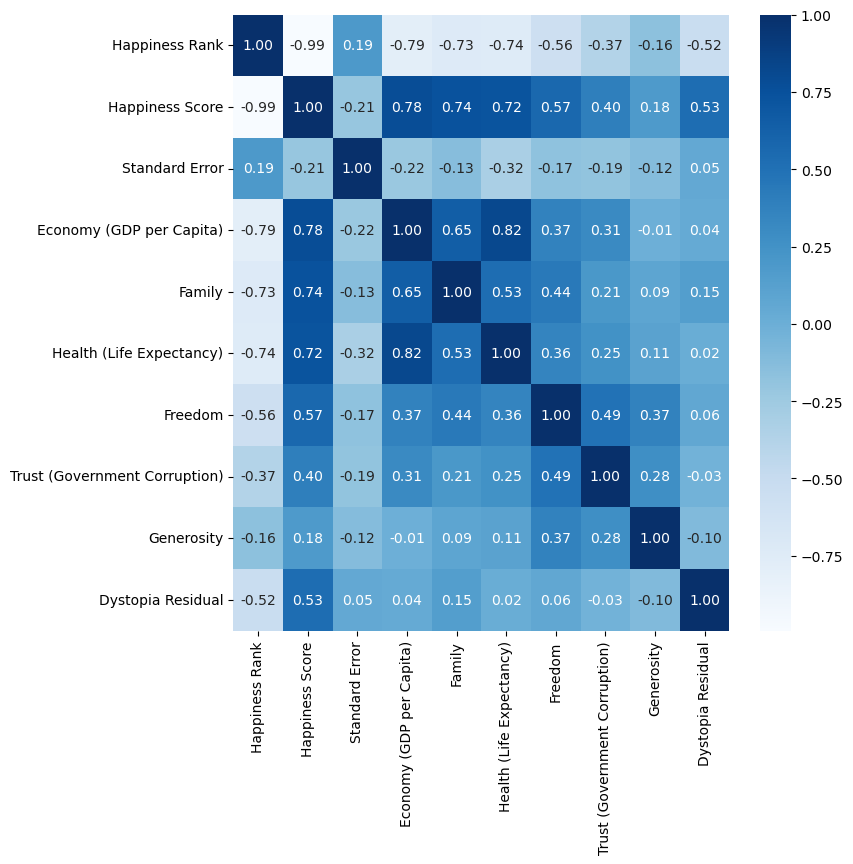

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot = True ,cmap = "Blues",fmt = ".2f" )

In [24]:
print('The top ten happiest Countries are : ')
data.head(10)

The top ten happiest Countries are : 


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,-3.460947,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,-3.575908,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,-3.455548,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,-3.389961,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,-3.198338,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [25]:
print('The last ten happiest Countries are : ')
data.tail(10)

The last ten happiest Countries are : 


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,-3.262305,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,-3.327018,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,-2.967923,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,-3.140989,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,-3.478943,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,-3.362746,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,-2.992737,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,-2.446686,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,-2.699041,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [30]:
# model selection
#importing required libraries 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [28]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.33 )

In [29]:
print("training data of x ", x_train.shape)
print("testing data of x", x_test.shape)
print("training data of y ", y_train.shape)
print("testing data of y", y_test.shape)


training data of x  (105, 8)
testing data of x (53, 8)
training data of y  (105,)
testing data of y (53,)


In [33]:
# Linear regression model
ln = LinearRegression()
ln.fit(x_train,y_train)
lin_reg_pred = ln.predict(x_test)
print(len(lin_reg_pred))

53


In [34]:
#checking the r2 score
r2 = r2_score(y_test,lin_reg_pred)
print(r2)

0.9999999369752685


In [39]:
# error
print("mean square error is : ",mean_squared_error(y_test,lin_reg_pred))
print("mean absolute Error is :",mean_absolute_error(y_test,lin_reg_pred))
print("The Root mean square error is : ",np.sqrt(mean_squared_error(y_test,lin_reg_pred)))

mean square error is :  8.371377032747966e-08
mean absolute Error is : 0.00024281240758054583
The Root mean square error is :  0.0002893333204583939


In [42]:
# Applying some more different models
models  = {
    "Random Forest":RandomForestRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "SVC":SVR()
}
for i in range(len(list(models))):
  #training the model
    model = list(models.values())[i]
    model.fit(x_train,y_train)
  #prediction   
    y_test_pred = model.predict(x_test)
    
    

    
    print(list(models.keys())[i])
    
# error
    print("The r2 score is :" ,r2_score(y_test,y_test_pred))
    print("mean square error is : ",mean_squared_error(y_test,y_test_pred))
    print("mean absolute Error is :",mean_absolute_error(y_test,y_test_pred))
    print("The Root mean square error is : ",np.sqrt(mean_squared_error(y_test,y_test_pred)))
    
    
    print("\n")


Random Forest
The r2 score is : 0.9034216347392123
mean square error is :  0.12828200756037736
mean absolute Error is : 0.2965677358490568
The Root mean square error is :  0.35816477710737743


Decision Tree
The r2 score is : 0.7556305050302524
mean square error is :  0.324588320754717
mean absolute Error is : 0.47364150943396227
The Root mean square error is :  0.5697265315523905


SVC
The r2 score is : 0.9906763864072251
mean square error is :  0.012384262936825659
mean absolute Error is : 0.07579295443381699
The Root mean square error is :  0.1112846033233064




clearly we can see our linear regression models gives us the best r2 score



So we are going to save the model


In [44]:
import joblib
joblib.dump(ln , "linear_regression_happiness_score_model.obj")

['linear_regression_happiness_score_model.obj']

In [46]:
#joblib.load("linear_regression_happiness_score_model.obj")

LinearRegression()